In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\Utente\AppData\Local\Temp\ipykernel_11752\3157450582.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def dataset_info(df):
    display(df.describe(),
    pd.DataFrame({
        'feature': df.columns.values,
        'dtypes': [df[col].dtype for col in df.columns],
        'n_unique': df.nunique().values,
        'n_nan': [df[col].isna().sum() for col in df.columns],
        'n_dupe': [df.duplicated().sum() for row in df.columns],
        'sample_unique': [df[col].unique() for col in df.columns]
        })
    )
    print(f'''
          Total Columns that having missing value = {df.isnull().any().sum()}
          Total Columns that are clean            = {df.shape[1] - df.isnull().any().sum()}
          Total Rows that having missing value    = {df.isnull().sum().sum()}
          Total Rows                              = {df.shape[0]}
          Totol Percentage of missing value      = {(df.isnull().sum().sum()/np.prod(df.shape)) * 100}
          ''')

In [3]:
def class_pie(class_counts):
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%',  explode=(0.1, 0.1), startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    
    legend_labels = [f'{index}: {count}' for index, count in zip(class_counts.index, class_counts)]
    plt.legend(legend_labels, title='Quality Counts', loc='upper right')
    plt.tight_layout()
    plt.show()

# LIBSVM

In [4]:
from scipy.sparse import csr_matrix, hstack
from sklearn.datasets import load_svmlight_file

## Diabetes

In [18]:
def load_diabetes():
    X_train, y_train = load_svmlight_file("LIBSVM/breast-cancer_scale.txt")
    X_train_prep = hstack([csr_matrix(np.ones((X_train.shape[0], 1))), X_train])
    return X_train_prep, y_train

## Breast cancer

# Syntethic dataset

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

X, y = make_classification(n_samples=5000, n_features=10, random_state=42)
y = 2 * encoder.fit_transform(y) - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (4000, 10), y_train = (4000,)
X_test = (1000, 10), y_test = (1000,)


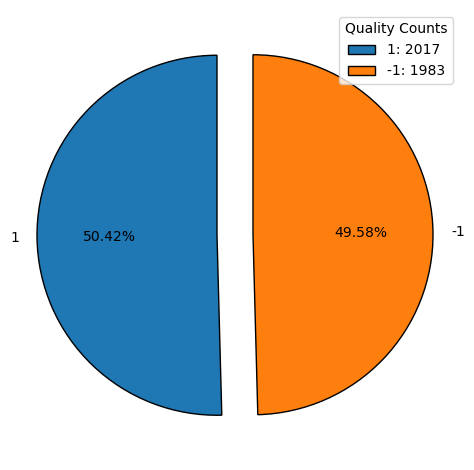

In [11]:
class_pie(pd.Series(y_train).value_counts())

In [16]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

X_train_prep.sample(10)

,0,1,2,3,4,5,6,7,8,9,10
2890,1.0,0.734663,-1.858465,-0.685057,-1.790861,0.916221,-1.428789,-1.584182,-0.351268,-0.356674,0.338373
1491,1.0,0.702758,1.029268,-0.226824,1.261750,-0.716142,-0.700760,1.153281,0.000721,2.724125,0.613145
1371,1.0,-0.197985,0.824480,-0.943018,1.105205,-0.911812,0.286136,1.020417,-0.067279,-0.086192,-1.007472
1460,1.0,0.696247,0.749693,0.383778,-0.438015,0.235757,0.810845,-0.547168,0.974968,0.216539,0.147724
17,1.0,2.919642,-0.282192,0.259882,-0.237481,-0.271092,0.124950,-0.205333,-0.078072,-1.490104,0.411935
230,1.0,-1.076272,1.290950,0.331109,1.338977,-0.620049,0.241252,1.197521,0.175796,-0.628741,0.442052
370,1.0,0.012175,-2.044287,-0.812307,-2.242364,0.834269,0.136510,-2.021071,-0.190762,1.669222,-1.136224
1126,1.0,-0.354640,-1.345359,-1.095286,-1.684330,-0.794845,-0.966861,-1.543330,0.024257,0.039240,-2.080832
1816,1.0,0.715782,-0.859991,0.618507,0.776787,-0.022740,-0.039593,0.908092,-1.315394,1.892563,0.654671
700,1.0,-0.852000,0.855567,2.319545,1.088396,0.676926,-3.004741,0.999112,-0.027823,-0.046450,-0.265373


In [17]:
X_train_prep.to_csv("synthetic/syn_X_train.csv", index=False)
X_test_prep.to_csv("synthetic/syn_X_test.csv", index=False)
pd.Series(y_train).to_csv("synthetic/syn_y_train.csv", index=False)
pd.Series(y_test).to_csv("synthetic/syn_y_test.csv", index=False)

# Apple quality dataset

In [4]:
df = pd.read_csv("apple_quality/apple_quality.csv")
display(df.head(2), df.sample(10), df.tail(2))

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1381,1381.0,6.406367,-2.752347,-4.164118,0.415241,0.999640,3.995602,1.724251569,good
3146,3146.0,-3.083350,0.628634,0.350293,-0.157696,-0.278420,1.024365,-0.671464525,good
3496,3496.0,-1.453214,-1.145158,-0.053282,2.144056,1.146402,1.457554,0.758104622,good
210,210.0,-0.663820,-0.801457,0.024577,3.526233,1.781736,1.010057,0.9389107,good
3395,3395.0,-1.489319,0.160941,-0.155989,-1.014487,0.451834,3.726459,1.493954536,bad
2017,2017.0,-0.922571,-1.977242,3.451115,3.809666,-4.929679,-5.611400,-1.094247351,bad
1934,1934.0,1.693654,-3.454192,-3.327473,-0.352645,3.311763,2.565219,1.656877646,bad
1743,1743.0,0.562269,0.946574,-1.791577,1.527887,1.894178,1.057596,-1.37733815,good
978,978.0,-1.745117,-2.074040,-0.430170,1.386736,2.482312,1.441094,2.97738182,bad
3757,3757.0,1.143042,-0.423877,-1.109456,2.541135,0.841867,1.610464,-0.012611428,good


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3999,3999.0,0.27854,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## Dataset cleaning

In [5]:
df = df[:-1].drop(columns={"A_id"})
df = df.dropna()
df= df.drop_duplicates()
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Quality"] = 2 * encoder.fit_transform(df["Quality"]) - 1
dataset_info(df)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.002000
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,1.000123
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-1.000000
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.000000
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,1.000000
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.000000
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Size,float64,4000,0,0,"[-3.970048523, -1.195217191, -0.292023862, -0...."
1,Weight,float64,4000,0,0,"[-2.512336381, -2.839256528, -1.351281995, -2...."
2,Sweetness,float64,4000,0,0,"[5.346329613, 3.664058758, -1.738429162, 1.324..."
3,Crunchiness,float64,4000,0,0,"[-1.012008712, 1.588232309, -0.342615928, -0.0..."
4,Juiciness,float64,4000,0,0,"[1.844900361, 0.853285795, 2.838635512, 3.6379..."
5,Ripeness,float64,4000,0,0,"[0.329839797, 0.867530082, -0.038033328, -3.41..."
6,Acidity,object,4000,0,0,"[-0.491590483, -0.722809367, 2.621636473, 0.79..."
7,Quality,int32,2,0,0,"[1, -1]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 8
          Total Rows that having missing value    = 0
          Total Rows                              = 4000
          Totol Percentage of missing value      = 0.0
          


## Training

### Prepare dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Quality"})
y = df["Quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (3200, 7), y_train = (3200,)
X_test = (800, 7), y_test = (800,)


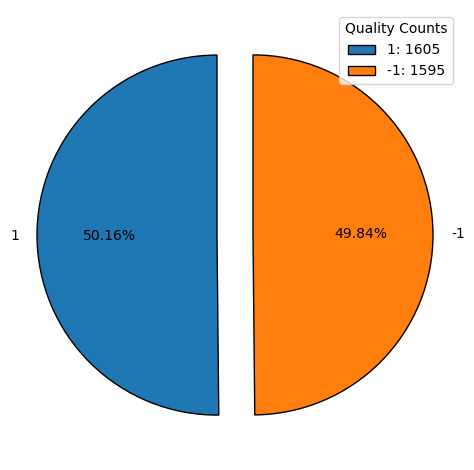

In [8]:
class_pie(y_train.value_counts())

In [9]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

X_train_prep.sample(10)

,0,1,2,3,4,5,6,7
2561,1.0,0.618425,-0.020273,-0.285193,-0.838010,1.144713,-0.798266,0.978470
2227,1.0,-0.524196,-0.657740,0.146158,0.815121,-0.142296,0.279233,1.473353
1624,1.0,-0.201073,0.557997,-0.145230,-0.587824,0.274330,0.516306,-0.969932
3042,1.0,-0.602191,0.288489,-0.321736,-0.869284,1.028984,-0.543140,1.957259
1010,1.0,0.483783,0.673572,-1.113215,1.443074,-0.993416,-1.231444,-0.591029
1311,1.0,-1.590221,1.953853,0.163120,-1.274150,0.450110,-0.493445,-0.402747
2399,1.0,0.503325,-0.309721,0.089083,0.087769,-1.073214,-0.636710,-0.059448
2218,1.0,-0.151837,0.467532,-1.322515,0.689762,-0.538547,0.923645,0.027659
2426,1.0,0.632457,-1.473798,-0.321493,0.361224,-0.426691,-0.482217,0.411864
2523,1.0,-0.628600,-0.969795,-0.816443,-0.376330,1.558890,0.285818,2.415120


In [12]:
X_train_prep.to_csv("apple_quality/apple_X_train.csv", index=False)
X_test_prep.to_csv("apple_quality/apple_X_test.csv", index=False)
y_train.to_csv("apple_quality/apple_y_train.csv", index=False)
y_test.to_csv("apple_quality/apple_y_test.csv", index=False)

### Train model

In [15]:
model = LogisticRegression(solver="lbfgs").fit(X_train_prep, y_train)
print(f"""
Train score: {accuracy_score(y_train, model.predict(X_train_prep))}
Test score: {accuracy_score(y_test, model.predict(X_test_prep))}""")


Train score: 0.7453125
Test score: 0.75375


# Breast cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
df = 

# Cars dataset

In [17]:
df = pd.read_csv("cars/car_data.csv")
display(df.head(2), df.sample(10), df.tail(2))

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0


,User ID,Gender,Age,AnnualSalary,Purchased
56,828,Male,48,21500,1
757,856,Male,38,76500,0


,User ID,Gender,Age,AnnualSalary,Purchased
998,299,Female,48,134000,1
999,687,Female,44,73500,0


## Dataset cleaning

In [18]:
df = df.drop(columns={"User ID"})
df = df.dropna()
df = df.drop_duplicates()
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [20]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df.loc[df["Purchased"] == 0, "Purchased"] = -1
df.sample(10)

,Gender,Age,AnnualSalary,Purchased
589,0,40,61000,-1
45,0,37,75000,-1
968,0,19,83500,-1
474,0,39,146500,1
163,1,36,78500,-1
992,1,24,67500,-1
621,1,49,24500,-1
758,0,37,53000,-1
840,1,60,84500,-1
706,0,28,89500,-1


## Prepare for training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Purchased"})
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (754, 3), y_train = (754,)
X_test = (189, 3), y_test = (189,)


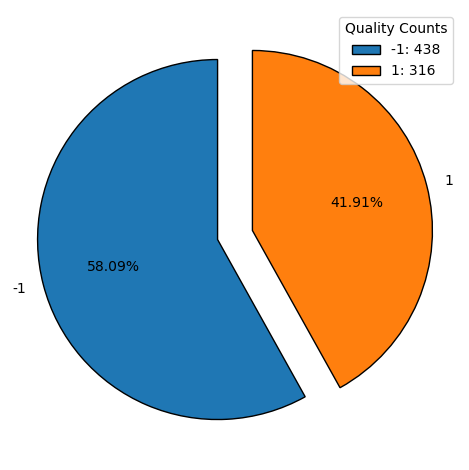

In [22]:
class_pie(y_train.value_counts())

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_car = pd.DataFrame(X_train_const)
X_test_car = pd.DataFrame(X_test_const)

X_train_car.sample(10)

,0,1,2,3
370,1.0,0.958423,1.000732,1.708989
461,1.0,-1.043380,-0.922977,-0.338782
407,1.0,-1.043380,0.817522,0.420182
727,1.0,-1.043380,-0.373346,-1.312547
752,1.0,-1.043380,-1.289398,-1.212307


In [24]:
X_train_car.to_csv("cars/car_X_train.csv", index=False)
X_test_car.to_csv("cars/car_X_test.csv", index=False)
y_train.to_csv("cars/car_y_train.csv", index=False)
y_test.to_csv("cars/car_y_test.csv", index=False)

## Model training

# HR score

In [2]:
df = pd.read_csv("hr_score/hr_score.csv")
display(df.head(2), df.sample(10), df.tail(2))

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
138,0.133333,0.577589,0.555556,0.2,0.4,0.410256,0.396698,0.394126,0.303885,0
287,0.000000,0.348596,0.666667,0.3,0.3,0.282051,0.169867,0.092030,0.063832,0
173,0.000000,0.585204,0.333333,0.1,0.2,0.076923,0.244944,0.262886,0.211453,0
174,0.466667,0.742827,1.000000,0.0,0.8,0.897436,0.913937,0.705515,0.782279,1
26,0.266667,0.729540,0.888889,0.7,0.5,0.641026,0.575499,0.562687,0.716048,1
210,0.333333,0.604684,0.777778,0.6,0.7,0.205128,0.427074,0.331143,0.392389,1
111,0.200000,0.457378,0.777778,0.3,0.2,0.230769,0.344550,0.316688,0.248684,1
255,0.466667,0.739160,1.000000,1.0,0.7,0.974359,0.866070,0.904063,0.966272,1
92,0.333333,0.734329,0.888889,0.5,0.6,0.435897,0.553757,0.414065,0.634370,1
268,0.000000,0.493004,0.333333,0.4,0.5,0.282051,0.453834,0.253320,0.401836,0


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
298,0.333333,0.654656,0.666667,0.5,0.7,0.589744,0.585173,0.549063,0.663228,1
299,0.600000,0.754280,0.222222,0.7,0.8,0.820513,0.936553,0.793214,0.718935,1


In [3]:
df = df.dropna()
df= df.drop_duplicates()
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["call_for_interview"] = 2 * encoder.fit_transform(df["call_for_interview"]) - 1
dataset_info(df)

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.231778,0.578350,0.681111,0.510667,0.521667,0.457692,0.480880,0.434732,0.426792,0.060000
std,0.238689,0.156784,0.238006,0.229482,0.230523,0.260942,0.244018,0.225863,0.248246,0.999866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.480041,0.527778,0.300000,0.300000,0.230769,0.297052,0.249501,0.224828,-1.000000
50%,0.200000,0.576121,0.666667,0.500000,0.500000,0.358974,0.433097,0.401338,0.389711,1.000000
75%,0.400000,0.685611,0.888889,0.700000,0.700000,0.666667,0.687145,0.612519,0.632039,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,years_of_experience,float64,16,0,0,"[0.3333333333333333, 0.1333333333333333, 0.0, ..."
1,functional_competency_score,float64,283,0,0,"[0.7494977777777777, 0.4906377777777777, 0.460..."
2,top1_skills_score,float64,10,0,0,"[0.7777777777777778, 0.4444444444444444, 0.555..."
3,top2_skills_score,float64,10,0,0,"[0.7, 0.3, 0.4, 0.8, 0.6, 0.5, 0.1, 1.0, 0.2, ..."
4,top3_skills_score,float64,11,0,0,"[0.8, 0.4, 0.3, 0.5, 0.6, 0.2, 0.7, 0.9, 1.0, ..."
5,behavior_competency_score,float64,39,0,0,"[0.7692307692307692, 0.1538461538461538, 0.051..."
6,top1_behavior_skill_score,float64,300,0,0,"[0.9316893589492192, 0.3520927425880082, 0.052..."
7,top2_behavior_skill_score,float64,300,0,0,"[0.6620421671026925, 0.1322306051248566, 0.089..."
8,top3_behavior_skill_score,float64,300,0,0,"[0.7524629947278958, 0.3169054776707523, 0.254..."
9,call_for_interview,int64,2,0,0,"[1, -1]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 10
          Total Rows that having missing value    = 0
          Total Rows                              = 300
          Totol Percentage of missing value      = 0.0
          


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"call_for_interview"})
y = df["call_for_interview"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (240, 9), y_train = (240,)
X_test = (60, 9), y_test = (60,)


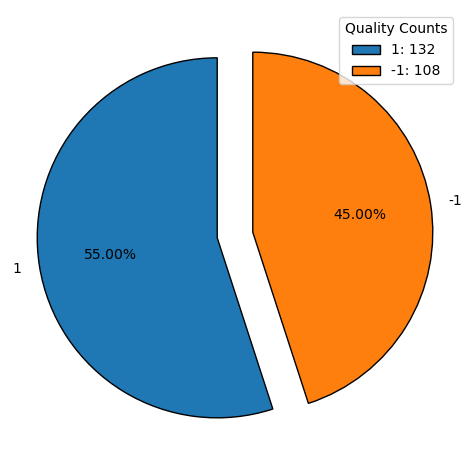

In [9]:
class_pie(y_train.value_counts())

In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

In [11]:
X_train_prep.to_csv("hr_score/hr_X_train.csv", index=False)
X_test_prep.to_csv("hr_score/hr_X_test.csv", index=False)
y_train.to_csv("hr_score/hr_y_train.csv", index=False)
y_test.to_csv("hr_score/hr_y_test.csv", index=False)

In [11]:
model = LogisticRegression(solver="lbfgs").fit(X_train_prep, y_train)
print(f"""
Train score: {accuracy_score(y_train, model.predict(X_train_prep))}
Test score: {accuracy_score(y_test, model.predict(X_test_prep))}""")


Train score: 0.9375
Test score: 0.9166666666666666


# Loan eligibility

In [5]:
df = pd.read_csv("loan_data/loan_data.csv")
display(df.head(2), df.sample(10), df.tail(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
553,LP002788,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban,N
121,LP001430,Female,No,0,Graduate,No,4166,0.0,44.0,360.0,1.0,Semiurban,Y
59,LP001199,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y
387,LP002243,Male,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban,N
60,LP001205,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
327,LP002082,Male,Yes,0,Graduate,Yes,5818,2160.0,184.0,360.0,1.0,Semiurban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df = df.drop(columns={"Loan_ID"})
df = df.dropna()
df = df.drop_duplicates()
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Loan_Status"] = 2 * encoder.fit_transform(df["Loan_Status"]) - 1

for i in range(0,5):
    df.iloc[:,i] = encoder.fit_transform(df.iloc[:,i])  
df.iloc[:,10] = encoder.fit_transform(df.iloc[:,10])

df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,-1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,-1
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,-1
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


In [8]:
dataset_info(df)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.383333
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.924574
min,150.000000,0.000000,9.000000,36.000000,0.000000,-1.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,-1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Gender,object,2,0,0,"[1, 0]"
1,Married,object,2,0,0,"[1, 0]"
2,Dependents,object,4,0,0,"[1, 0, 2, 3]"
3,Education,object,2,0,0,"[0, 1]"
4,Self_Employed,object,2,0,0,"[0, 1]"
5,ApplicantIncome,int64,405,0,0,"[4583, 3000, 2583, 6000, 5417, 2333, 3036, 400..."
6,CoapplicantIncome,float64,232,0,0,"[1508.0, 0.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."
7,LoanAmount,float64,186,0,0,"[128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0..."
8,Loan_Amount_Term,float64,9,0,0,"[360.0, 120.0, 180.0, 60.0, 300.0, 480.0, 240...."
9,Credit_History,float64,2,0,0,"[1.0, 0.0]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 12
          Total Rows that having missing value    = 0
          Total Rows                              = 480
          Totol Percentage of missing value      = 0.0
          


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Loan_Status"})
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (384, 11), y_train = (384,)
X_test = (96, 11), y_test = (96,)


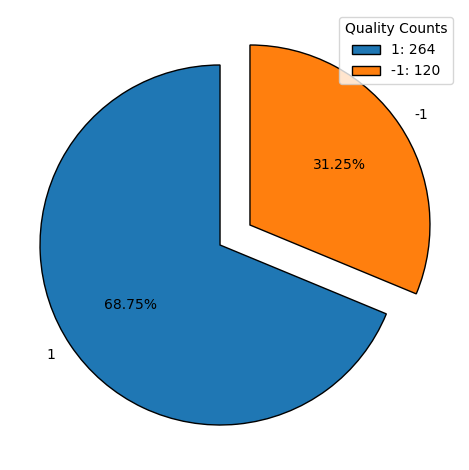

In [10]:
class_pie(y_train.value_counts())

In [11]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

In [11]:
X_train_prep.to_csv("loan_data/loan_X_train.csv", index=False)
X_test_prep.to_csv("loan_data/loan_X_test.csv", index=False)
y_train.to_csv("loan_data/loan_y_train.csv", index=False)
y_test.to_csv("loan_data/loan_y_test.csv", index=False)

In [12]:
model = LogisticRegression(solver="lbfgs").fit(X_train_prep, y_train)
print(f"""
Train score: {accuracy_score(y_train, model.predict(X_train_prep))}
Test score: {accuracy_score(y_test, model.predict(X_test_prep))}""")


Train score: 0.8072916666666666
Test score: 0.8229166666666666


# Bank churn

In [4]:
df = pd.read_csv("bank_churn/bank_churn.csv")
display(df.head(2), df.sample(10), df.tail(2))

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9951,15763874,635,Spain,Male,46,8,0.00,2,1,1,60739.16,0
5470,15736124,617,France,Male,25,1,102585.88,2,1,1,115387.40,0
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01,0
5738,15654074,653,France,Male,38,8,119315.75,1,1,0,150468.35,0
5079,15692406,427,France,Male,37,5,0.00,2,1,1,121485.10,0
9230,15768465,582,Germany,Male,35,8,121309.17,2,1,1,28750.67,0
4075,15761600,713,France,Male,43,5,86394.14,1,1,1,130001.13,0
8497,15649359,587,France,Male,36,1,0.00,2,0,1,17135.60,0
8779,15650322,701,France,Female,34,3,105588.66,1,0,1,74694.41,0
8769,15646262,622,France,Male,31,7,0.00,1,1,0,35408.77,0


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df = df.drop(columns={"customer_id"})
df = df.drop_duplicates()
df = df.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["churn"] = 2 * encoder.fit_transform(df["churn"]) - 1
df["country"] = encoder.fit_transform(df["country"])
df["gender"] = encoder.fit_transform(df["gender"])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"churn"})
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (8000, 10), y_train = (8000,)
X_test = (2000, 10), y_test = (2000,)


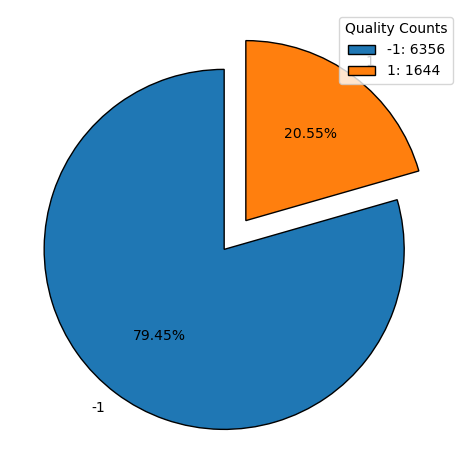

In [8]:
class_pie(y_train.value_counts())

In [9]:
X_train_const = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test_const = np.hstack((np.ones((X_test.shape[0],1)), X_test))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

In [10]:
X_train_prep.to_csv("bank_churn/bank_X_train.csv", index=False)
X_test_prep.to_csv("bank_churn/bank_X_test.csv", index=False)
y_train.to_csv("bank_churn/bank_y_train.csv", index=False)
y_test.to_csv("bank_churn/bank_y_test.csv", index=False)

In [10]:
model = LogisticRegression(solver="lbfgs").fit(X_train_prep, y_train)
print(f"""
Train score: {accuracy_score(y_train, model.predict(X_train_prep))}
Test score: {accuracy_score(y_test, model.predict(X_test_prep))}""")


Train score: 0.807125
Test score: 0.815


# Heart attack possibility

In [4]:
df = pd.read_csv("heart_attack/heart.csv")
display(df.head(2), df.sample(10), df.tail(2))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df = df.dropna()
df= df.drop_duplicates()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["target"] = 2 * encoder.fit_transform(df["target"]) - 1

In [7]:
dataset_info(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.086093
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.997941
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,-1.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,age,int64,41,0,0,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
1,sex,int64,2,0,0,"[1, 0]"
2,cp,int64,4,0,0,"[3, 2, 1, 0]"
3,trestbps,int64,49,0,0,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
4,chol,int64,152,0,0,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
5,fbs,int64,2,0,0,"[1, 0]"
6,restecg,int64,3,0,0,"[0, 1, 2]"
7,thalach,int64,91,0,0,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
8,exang,int64,2,0,0,"[0, 1]"
9,oldpeak,float64,40,0,0,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."



          Total Columns that having missing value = 0
          Total Columns that are clean            = 14
          Total Rows that having missing value    = 0
          Total Rows                              = 302
          Totol Percentage of missing value      = 0.0
          


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"target"})
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (241, 13), y_train = (241,)
X_test = (61, 13), y_test = (61,)


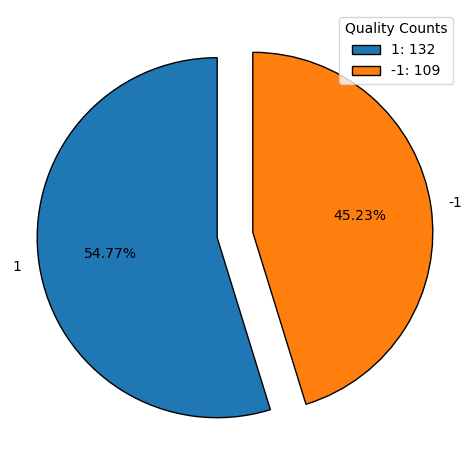

In [9]:
class_pie(y_train.value_counts())

In [10]:
X_train_const = np.hstack((np.ones((X_train.shape[0],1)), X_train))
X_test_const = np.hstack((np.ones((X_test.shape[0],1)), X_test))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

X_train_prep.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
66,1.0,-0.040764,0.731459,-0.966493,-0.405106,0.374540,-0.391293,-0.991522,-1.822910,1.517027,1.083216,-0.684707,0.333307,1.140502
11,1.0,-1.787267,0.731459,1.932986,-0.630711,-0.292389,-0.391293,0.890028,1.444252,1.517027,2.522527,-0.684707,-0.683490,1.140502
20,1.0,-0.695702,0.731459,-0.966493,-0.405106,0.526980,-0.391293,-0.991522,0.728161,-0.659184,-0.446052,-0.684707,-0.683490,1.140502
13,1.0,0.286705,0.731459,-0.966493,1.174129,0.526980,-0.391293,0.890028,-2.762779,1.517027,0.183647,-0.684707,0.333307,1.140502
53,1.0,0.614175,0.731459,-0.966493,-0.066699,0.126823,-0.391293,0.890028,-0.256463,1.517027,0.363560,0.965436,0.333307,1.140502
77,1.0,-1.350641,0.731459,-0.966493,0.271709,1.308240,-0.391293,0.890028,-1.106820,1.517027,0.723388,-0.684707,-0.683490,-2.232025
107,1.0,1.159957,-1.367131,0.966493,0.497314,3.251860,2.555631,-0.991522,0.325361,-0.659184,-0.176181,0.965436,0.333307,-0.545762
96,1.0,0.505018,0.731459,-0.966493,0.497314,-1.321365,-0.391293,0.890028,0.549139,1.517027,-0.895837,0.965436,0.333307,1.140502
119,1.0,0.614175,-1.367131,0.966493,-0.630711,-1.302310,2.555631,0.890028,-2.404734,-0.659184,-0.895837,0.965436,-0.683490,-0.545762
57,1.0,1.487426,0.731459,0.966493,-0.743513,0.584146,-0.391293,0.890028,0.056827,-0.659184,0.003733,0.965436,0.333307,1.140502


In [17]:
X_train_prep.to_csv("heart_attack/heart_X_train.csv", index=False)
X_test_prep.to_csv("heart_attack/heart_X_test.csv", index=False)
y_train.to_csv("heart_attack/heart_y_train.csv", index=False)
y_test.to_csv("heart_attack/heart_y_test.csv", index=False)

In [11]:
model = LogisticRegression(solver="lbfgs").fit(X_train_prep, y_train)
print(f"""
Train score: {accuracy_score(y_train, model.predict(X_train_prep))}
Test score: {accuracy_score(y_test, model.predict(X_test_prep))}""")


Train score: 0.8589211618257261
Test score: 0.8360655737704918


# Diabetes

In [4]:
df = pd.read_csv("diabetes/diabetes.csv")
display(df.head(2), df.sample(10), df.tail(2))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
920,1,82,64,13,95,21.2,0.415,23,0
1379,2,158,90,0,0,31.6,0.805,66,1
1727,1,100,74,12,46,19.5,0.149,28,0
935,0,124,56,13,105,21.8,0.452,21,0
63,2,141,58,34,128,25.4,0.699,24,0
1800,10,129,62,36,0,41.2,0.441,38,1
1798,3,158,64,13,387,31.2,0.295,24,0
993,0,105,90,0,0,29.6,0.197,46,0
1159,1,168,88,29,0,35.0,0.905,52,1
1476,4,144,82,32,0,38.5,0.554,37,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [5]:
df = df.dropna()
df= df.drop_duplicates()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Outcome"] = 2 * encoder.fit_transform(df["Outcome"]) - 1

In [7]:
dataset_info(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,-0.319892
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.948091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,-1.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,-1.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,-1.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


,feature,dtypes,n_unique,n_nan,n_dupe,sample_unique
0,Pregnancies,int64,17,0,0,"[2, 0, 1, 4, 8, 3, 6, 5, 7, 10, 12, 9, 11, 13,..."
1,Glucose,int64,136,0,0,"[138, 84, 145, 135, 139, 173, 99, 194, 83, 89,..."
2,BloodPressure,int64,47,0,0,"[62, 82, 0, 68, 78, 72, 80, 65, 90, 70, 74, 64..."
3,SkinThickness,int64,53,0,0,"[35, 31, 0, 42, 41, 32, 17, 28, 30, 38, 18, 15..."
4,Insulin,int64,182,0,0,"[0, 125, 250, 480, 265, 66, 122, 76, 145, 193,..."
5,BMI,float64,247,0,0,"[33.6, 38.2, 44.2, 42.3, 40.7, 46.5, 25.6, 26...."
6,DiabetesPedigreeFunction,float64,505,0,0,"[0.127, 0.233, 0.63, 0.365, 0.536, 1.159, 0.29..."
7,Age,int64,52,0,0,"[47, 23, 31, 24, 21, 58, 28, 67, 42, 33, 45, 2..."
8,Outcome,int64,2,0,0,"[1, -1]"



          Total Columns that having missing value = 0
          Total Columns that are clean            = 9
          Total Rows that having missing value    = 0
          Total Rows                              = 744
          Totol Percentage of missing value      = 0.0
          


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns={"Outcome"})
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

print(f"""
X_train = {X_train.shape}, y_train = {y_train.shape}
X_test = {X_test.shape}, y_test = {y_test.shape}""")


X_train = (595, 8), y_train = (595,)
X_test = (149, 8), y_test = (149,)


In [9]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_const = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_const = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

X_train_prep = pd.DataFrame(X_train_const)
X_test_prep = pd.DataFrame(X_test_const)

X_train_prep.sample(10)

,0,1,2,3,4,5,6,7,8
20,1.0,1.642546,0.932179,0.449140,0.783562,0.846441,0.251216,1.304844,-0.003422
120,1.0,-1.134793,0.220419,2.154348,1.519310,0.468560,4.413100,-0.462621,-0.597255
133,1.0,-1.134793,-1.357831,0.982017,0.477000,-0.360935,0.592769,-0.108512,-1.021421
558,1.0,-1.134793,0.467988,0.768866,0.354375,-0.729599,-0.621641,-0.733591,2.202242
267,1.0,-1.134793,0.034743,0.982017,0.967499,-0.729599,0.377717,-0.838285,-0.342755
501,1.0,-0.826200,-1.048370,-0.403464,0.170438,-0.324068,-0.292738,-0.145463,-0.851754
48,1.0,0.716766,0.220419,1.088593,-0.871872,2.275014,-1.595699,0.347210,2.287076
465,1.0,1.642546,-0.058095,0.129413,0.047813,-0.213469,-1.443898,0.812171,1.269077
4,1.0,1.025359,0.437042,1.088593,-1.301058,-0.729599,-0.292738,-0.798255,1.438743
106,1.0,-0.826200,0.344204,1.728046,0.415687,0.560726,0.074115,-0.724354,1.014577


In [12]:
X_train_prep.to_csv("diabetes/diab_X_train.csv", index=False)
X_test_prep.to_csv("diabetes/diab_X_test.csv", index=False)
y_train.to_csv("diabetes/diab_y_train.csv", index=False)
y_test.to_csv("diabetes/diab_y_test.csv", index=False)

In [10]:
model = LogisticRegression(solver="lbfgs").fit(X_train_prep, y_train)
print(f"""
Train score: {accuracy_score(y_train, model.predict(X_train_prep))}
Test score: {accuracy_score(y_test, model.predict(X_test_prep))}""")


Train score: 0.773109243697479
Test score: 0.7785234899328859
